# Parte 1: Datos

Cargar los datos

In [151]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd
import numpy as np


In [56]:
boston = pd.read_csv('C:/Users/aochavez/OneDrive - deacero.com/Documentos/DT Activities/Modelado/data/Boston.csv').drop('Unnamed: 14',axis=1)

X = boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = boston[['MEDV']]

In [190]:
X_train, X_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.25,
                                                   shuffle= True, #aleatorizar los datos
                                                   random_state= 0) 

# Parte 2

Funcion RMSE

In [138]:
def RMSE(real,predicted):

    if type(real) == type(pd.DataFrame([1])):
        y_real = real.values
        y_predicted = predicted
    elif type(real) == type(pd.DataFrame([1])):
        y_predicted = predicted.values
        y_real = real
    else:
        y_real = real
        y_predicted = predicted
        
    square_errors = []

    for n,i in enumerate(range(0,len(y_real))):
        square_errors.append((y_real[i]-y_predicted[i])**2)

    MSE= sum(square_errors)/(n+1)
    RMSE = np.sqrt(MSE)

    return RMSE


In [139]:
real_values = [3, 9, 27]
predicted_values = [2.9,2.9**2,2.9**3]

print('RMSE utilizando mean_squared_error de sklearn.metrics: ',mean_squared_error(real_values, predicted_values)**0.5)
print('RMSE utilizando fórmula manual: ',RMSE(real_values, predicted_values))


RMSE utilizando mean_squared_error de sklearn.metrics:  1.5465467985159715
RMSE utilizando fórmula manual:  1.5465467985159715


Modelo con datos de entrenamiento

In [140]:
reg = KNeighborsRegressor(3)
reg.fit(X_train, y_train)
train_predicted = reg.predict(X_train)
test_predicted = reg.predict(X_test)



In [148]:
print('RMSE utilizando mean_squared_error de sklearn.metrics: ',mean_squared_error(y_train, train_predicted)**0.5)
print('RMSE utilizando fórmula manual: ',RMSE(real=y_train, predicted=train_predicted))

RMSE utilizando mean_squared_error de sklearn.metrics:  4.311224977113059
RMSE utilizando fórmula manual:  [4.31122498]


In [147]:
print('RMSE utilizando mean_squared_error de sklearn.metrics: ',mean_squared_error(y_test, test_predicted)**0.5)
print('RMSE utilizando fórmula manual: ',RMSE(real=y_test, predicted=test_predicted))

RMSE utilizando mean_squared_error de sklearn.metrics:  6.328510389067235
RMSE utilizando fórmula manual:  [6.32851039]


# Parte 3

In [ ]:

def cross_val(X_train, y_train, k):
     k_splits = KFold(n_splits=k, random_state=1, shuffle=True) 
     reg = KNeighborsRegressor(3)
     reg.fit(X_train, y_train)
     scores = cross_val_score(reg, X=X_train, y=y_train, cv=k_splits, n_jobs=1)
     print('RMSE', sqrt(mean(absolute(scores))))

In [ ]:
k_splits = KFold(n_splits=5, random_state=1, shuffle=True) 
k_splits

In [ ]:
for training_values, test_values in k_splits.split(X): # X es la muestra de datos que quiero segmentar
    print("Entrenamiento: ", X.iloc[training_values], "Prueba: ", X.iloc[test_values])

In [187]:
def cross_val(X_train, y_train, k):
    regr= KNeighborsRegressor(3)
    rmse_mean=[]
    for training_values, test_values in k_splits.split(X): # X es la muestra de datos que quiero 
        #print("Entrenamiento: ", training_values, "Prueba: ", test_values)
        X_training, X_test = X.iloc[training_values], X.iloc[test_values]
        y_training, y_test = y.iloc[training_values], y.iloc[test_values]

        regr.fit(X_training,y_training)
        test_predicted =regr.predict(X_test)
        rmse_mean.append(mean_squared_error(y_test, test_predicted)**0.5)

    return mean(rmse_mean)
    
cross_val(X_train=X_train, y_train=y_train, k=5)
    

6.562771862777953

# Parte 4

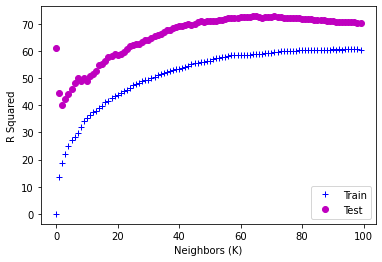

In [198]:
X_train, X_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.25,
                                                   shuffle= True, #aleatorizar los datos
                                                   random_state= 0) 


rmse_resultados_train = []
rmse_resultados_test = []

for num in range(1,101):

    reg = KNeighborsRegressor(num)
    reg.fit(X_train, y_train)

    train_predicted = reg.predict(X_train)
    test_predicted = reg.predict(X_test)

    rmse = mean_squared_error(y_train, train_predicted)
    rmse_resultados_train.append(rmse)

    rmse = mean_squared_error(y_test, test_predicted)
    rmse_resultados_test.append(rmse)

import matplotlib.pyplot as plt
plt.plot(rmse_resultados_train,'b+', rmse_resultados_test, 'mo')
plt.legend(["Train", "Test"], loc ="lower right")
plt.ylabel('R Squared')
plt.xlabel('Neighbors (K)')
plt.show()